# Quiz 4(100 points total)
The deliverable of this quiz is this jupyter-notebook completed with your solution.

If not necessary, you are <b>not allowed</b> to change the code that are provided, you are being assessed based on:
  - 1. Code execution - 25%
  - 2. Clarity of the code (e.g., easy to follow, has pertinent comments, etc.) - 25%
  - 3. Proper usage of the techniques seen in class - 25%
  - 4. Quality and correcteness of the results - 25%

(The data for this quiz can be downloaded here: https://drive.google.com/file/d/1GM7YQ1oPwr2NrjFxqB9KR4cscSmX779x/view?usp=share_link)
      
## Importing Python Libraries

In [ ]:
# Install tensorflow_hub using: pip install tensorflow_hub first
!pip install tensorflow-hub
# Install CV2 using: pip install opencv-python
!pip install opencv-python

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding

## 1. Make predictions using ready made model (without any training)

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.models.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])


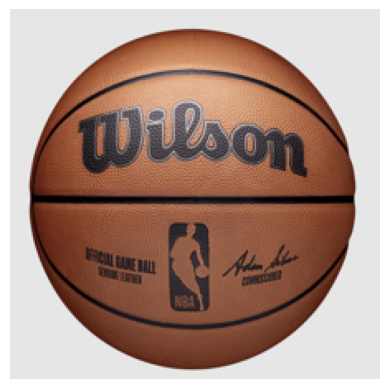

In [41]:
image_path = "basketball.jpg"
basketball = Image.open(image_path).resize(IMAGE_SHAPE)

#you can change the directory based on where you save the data on your own computer

plt.axis('off')
plt.imshow(basketball)

In [42]:
basketball = np.array(basketball)/255.0
basketball.shape

(224, 224, 3)

In [43]:
basketball = basketball[np.newaxis, ...]

In [45]:
#use the 'classifier' model in the first cell to predict the label of the basketball

# Include your solution below

result = classifier.predict(basketball)
result.shape

1/1 [==============================] - 2s 2s/step


(1, 1001)

In [46]:
predicted_label_index = np.argmax(result)
predicted_label_index

431

In [48]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()

In [49]:
image_labels[predicted_label_index]

'basketball'

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Load dogs dataset

In [63]:
data_dir = '/content/drive/MyDrive/DogData/Data/dogs'
print(type(data_dir))

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir
print(type(data_dir))


<class 'str'>
<class 'pathlib.PosixPath'>


In [64]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/drive/MyDrive/DogData/Data/dogs/bedlington_terrier/n02093647_2779.jpg'),
 PosixPath('/content/drive/MyDrive/DogData/Data/dogs/bedlington_terrier/n02093647_2822.jpg'),
 PosixPath('/content/drive/MyDrive/DogData/Data/dogs/bedlington_terrier/n02093647_3015.jpg'),
 PosixPath('/content/drive/MyDrive/DogData/Data/dogs/bedlington_terrier/n02093647_2951.jpg'),
 PosixPath('/content/drive/MyDrive/DogData/Data/dogs/bedlington_terrier/n02093647_2941.jpg')]

In [65]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

577


In [66]:
pugs = list(data_dir.glob('pug/*'))
pugs[:5]

[PosixPath('/content/drive/MyDrive/DogData/Data/dogs/pug/n02110958_12025.jpg'),
 PosixPath('/content/drive/MyDrive/DogData/Data/dogs/pug/n02110958_10186.jpg'),
 PosixPath('/content/drive/MyDrive/DogData/Data/dogs/pug/n02110958_11194.jpg'),
 PosixPath('/content/drive/MyDrive/DogData/Data/dogs/pug/n02110958_12130.jpg'),
 PosixPath('/content/drive/MyDrive/DogData/Data/dogs/pug/n02110958_11256.jpg')]

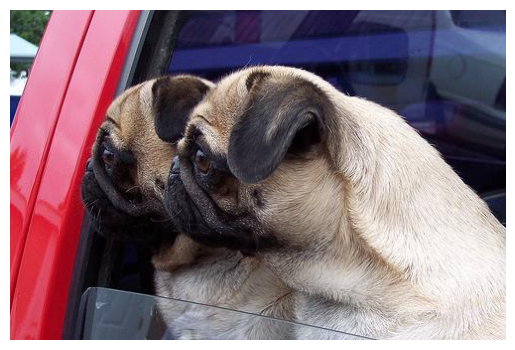

In [67]:
pug = Image.open(str(pugs[2]))
plt.axis('off')
plt.imshow(pug)

## 3. Read dogs images from disk into numpy array using opencv


In [73]:
# You need to finish the dogs_images_dict

# Include your solution below

dogs_images_dict = {
    'beagle': list(data_dir.glob('beagle/*')),
    'bedlington_terrier': list(data_dir.glob('bedlington_terrier/*')),
    'pug': list(data_dir.glob('pug/*')),
}

In [74]:
dogs_labels_dict = {
    'beagle': 0,
    'bedlington_terrier': 1,
    'pug': 2,
}

In [75]:
dogs_images_dict['pug'][:5]

[PosixPath('/content/drive/MyDrive/DogData/Data/dogs/pug/n02110958_12025.jpg'),
 PosixPath('/content/drive/MyDrive/DogData/Data/dogs/pug/n02110958_10186.jpg'),
 PosixPath('/content/drive/MyDrive/DogData/Data/dogs/pug/n02110958_11194.jpg'),
 PosixPath('/content/drive/MyDrive/DogData/Data/dogs/pug/n02110958_12130.jpg'),
 PosixPath('/content/drive/MyDrive/DogData/Data/dogs/pug/n02110958_11256.jpg')]

In [76]:
str(dogs_images_dict['pug'][0])

'/content/drive/MyDrive/DogData/Data/dogs/pug/n02110958_12025.jpg'

In [77]:
img = cv2.imread(str(dogs_images_dict['pug'][0]))
img.shape

(471, 500, 3)

In [78]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [79]:
X, y = [], []

for dog_name, images in dogs_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(dogs_labels_dict[dog_name])

In [80]:
X = np.array(X)
y = np.array(y)

## 4. Train test split

In [81]:
from sklearn.model_selection import train_test_split

# Include your solution below

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)


# 4.1 Representing Labels using one-hot-ecoding

In [82]:
k = np.unique(y).size
Y_oh_train = to_categorical(y_train, k)
Y_oh_val = to_categorical(y_val, k)
Y_oh_test = to_categorical(y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

Y_train[:5]:
[1 0 0 0 1]

Y_oh_train[:5]=
[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


## 5. Preprocessing: scale images

In [83]:
X_train_scaled = X_train / 255
X_val_scaled = X_val /255
X_test_scaled = X_test / 255

# 6. Make prediction using pre-trained model on new flowers dataset

In [84]:
X[0].shape

(224, 224, 3)

In [85]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [86]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

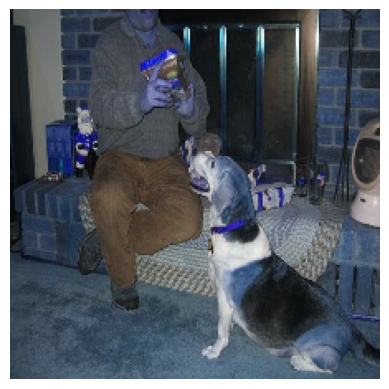

In [87]:
plt.axis('off')
plt.imshow(X[0])

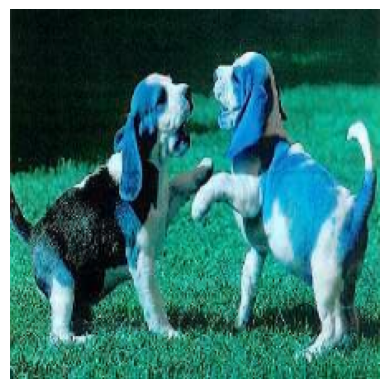

In [88]:
plt.axis('off')
plt.imshow(X[1])

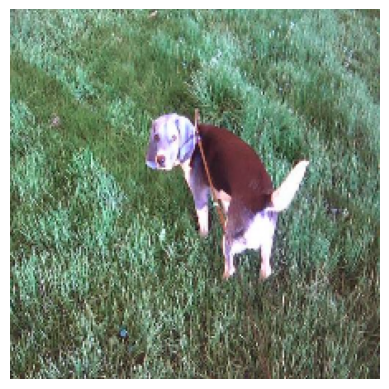

In [89]:
plt.axis('off')
plt.imshow(X[2])

In [90]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 548ms/step


array([795, 795, 795])

In [91]:
image_labels[predicted[0]]

'shower curtain'

# 7. Now take pre-trained model and retrain it using flowers images

In [92]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)


In [95]:
def my_model(num_of_dogs):
    #Include your solution below


    model = tf.keras.models.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_dogs)
])

    return model

In [96]:
num_of_dogs = np.unique(y).size

model1 = my_model(num_of_dogs)
model1.summary()

model2 = my_model(num_of_dogs)
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 3)                 3843      
                                                          

categorical_crossentropy you use one hot encoding,

and if you use sparse_categorical_crossentropy you encode as normal integers.

In [97]:
#model1 is for CategoricalCrossentropy() loss function
#model2 is for SparseCategoricalCrossentropy() loss function

# train the two models and see the difference of their performance

model1.compile(
  optimizer="adam",
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'])

history = model1.fit(X_train_scaled, Y_oh_train, validation_data=(X_val_scaled,Y_oh_val),batch_size= 64, epochs= 10)

Epoch 1/10
6/6 [==============================] - 30s 4s/step - loss: 2.2097 - accuracy: 0.2725 - val_loss: 0.9205 - val_accuracy: 0.5690
Epoch 2/10
6/6 [==============================] - 17s 3s/step - loss: 0.6259 - accuracy: 0.7043 - val_loss: 0.5678 - val_accuracy: 0.8362
Epoch 3/10
6/6 [==============================] - 17s 3s/step - loss: 0.7428 - accuracy: 0.9275 - val_loss: 2.3159 - val_accuracy: 0.9224
Epoch 4/10
6/6 [==============================] - 17s 3s/step - loss: 6.1448 - accuracy: 0.9536 - val_loss: 10.0392 - val_accuracy: 0.9397
Epoch 5/10
6/6 [==============================] - 20s 4s/step - loss: 13.5266 - accuracy: 0.9565 - val_loss: 15.0553 - val_accuracy: 0.9138
Epoch 6/10
6/6 [==============================] - 18s 3s/step - loss: 15.2746 - accuracy: 0.9478 - val_loss: 14.6375 - val_accuracy: 0.8966
Epoch 7/10
6/6 [==============================] - 18s 3s/step - loss: 13.8882 - accuracy: 0.8986 - val_loss: 12.5124 - val_accuracy: 0.8448
Epoch 8/10
6/6 [===========

In [98]:
model1.evaluate(X_test_scaled,Y_oh_test)

4/4 [==============================] - 4s 957ms/step - loss: 10.8380 - accuracy: 0.6552


[10.838029861450195, 0.6551724076271057]

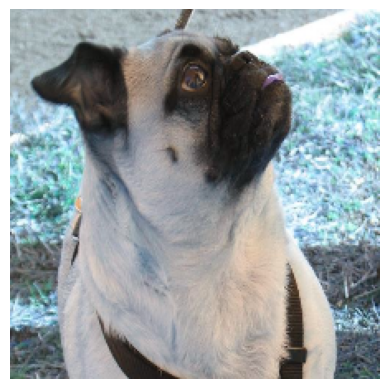

In [99]:
# choose an image from the testing dataset for testing, for example X_test_scaled[1]
# you can try other images if you want by changing the index of X_test_scaled

testing_image = X_test_scaled[1]
plt.axis('off')
plt.imshow(testing_image)

testing_image = testing_image[np.newaxis, ...]

In [100]:
pred = model1.predict(testing_image)

labels = list(dogs_labels_dict.keys())

predicted_label =labels[np.argmax(pred)]
print("The predicted label for this image is: ", predicted_label)

1/1 [==============================] - 1s 561ms/step
The predicted label for this image is:  pug


In [101]:
model2.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model2.fit(X_train_scaled, y_train, validation_data=(X_val_scaled,y_val),batch_size= 64, epochs= 10)

Epoch 1/10
6/6 [==============================] - 20s 3s/step - loss: 0.7257 - accuracy: 0.7333 - val_loss: 0.3668 - val_accuracy: 0.9397
Epoch 2/10
6/6 [==============================] - 17s 3s/step - loss: 0.2443 - accuracy: 0.9797 - val_loss: 0.1595 - val_accuracy: 0.9741
Epoch 3/10
6/6 [==============================] - 22s 4s/step - loss: 0.1013 - accuracy: 0.9942 - val_loss: 0.0944 - val_accuracy: 0.9828
Epoch 4/10
6/6 [==============================] - 18s 3s/step - loss: 0.0559 - accuracy: 0.9913 - val_loss: 0.0696 - val_accuracy: 0.9828
Epoch 5/10
6/6 [==============================] - 19s 3s/step - loss: 0.0376 - accuracy: 0.9942 - val_loss: 0.0564 - val_accuracy: 0.9828
Epoch 6/10
6/6 [==============================] - 17s 3s/step - loss: 0.0279 - accuracy: 0.9971 - val_loss: 0.0502 - val_accuracy: 0.9828
Epoch 7/10
6/6 [==============================] - 23s 4s/step - loss: 0.0236 - accuracy: 0.9971 - val_loss: 0.0468 - val_accuracy: 0.9828
Epoch 8/10
6/6 [==================

In [102]:
model2.evaluate(X_test_scaled,y_test)

4/4 [==============================] - 3s 765ms/step - loss: 0.0284 - accuracy: 1.0000


[0.0283987894654274, 1.0]

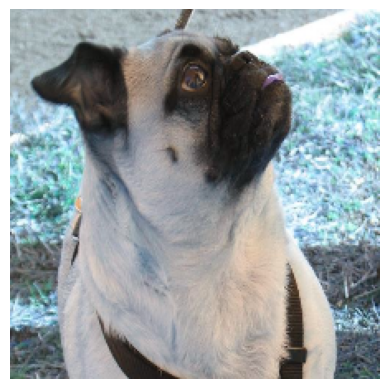

In [103]:
# choose an image from the testing dataset for testing, for example X_test_scaled[1]
testing_image = X_test_scaled[1]
plt.axis('off')
plt.imshow(testing_image)

testing_image = testing_image[np.newaxis, ...]

In [104]:
pred = model2.predict(testing_image)

labels = list(dogs_labels_dict.keys())

predicted_label =labels[np.argmax(pred)]
print("The predicted label for this image is: ", predicted_label)

1/1 [==============================] - 1s 932ms/step
The predicted label for this image is:  pug
